In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from utils.pred_crop   import predict_with_uncertainty, label_encoder
from utils.pred_profit import get_profit_recommendation, get_price_stats

# Load and split
df_all = pd.read_csv('data/Crop_recommendation.csv')
X = df_all[['N','P','K','temperature','humidity','ph','rainfall']].values
y = label_encoder.transform(df_all['label'])
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Pick one sample and compute profit means/stds
x_sample = X_test[0]
probs, uncert = predict_with_uncertainty(x_sample, n_samples=100)
profit_means, profit_stds, best_crop = get_profit_recommendation(
    pred_probs=probs,
    pred_uncerts=uncert,
    n_samples=1000,
    risk_aversion=0.5
)

print("Risk-adjusted best crop:", best_crop)

Risk-adjusted best crop: apple


In [21]:
# Build DataFrame of raw price stats
price_means, price_stds = get_price_stats()
df_prices = pd.DataFrame({
    'crop': list(price_means.keys()),
    'price_mean': list(price_means.values()),
    'price_std':  list(price_stds.values()),
})
df_prices_sorted = df_prices.sort_values(
    'price_mean', ascending=False
).reset_index(drop=True)

# Display table
from IPython.display import display
display(df_prices_sorted)


,crop,price_mean,price_std
0,coffee,26166.666667,305.505046
1,apple,10635.526946,3370.364570
2,pomegranate,8506.633663,2286.387665
3,blackgram,8275.366667,2064.447150
4,chickpea,8236.500000,2282.965516
5,cotton,7020.783784,524.687533
6,grapes,6853.783784,2988.341136
7,coconut,6650.000000,1525.047288
8,lentil,6564.710526,429.296024
9,orange,6411.114286,2958.315983


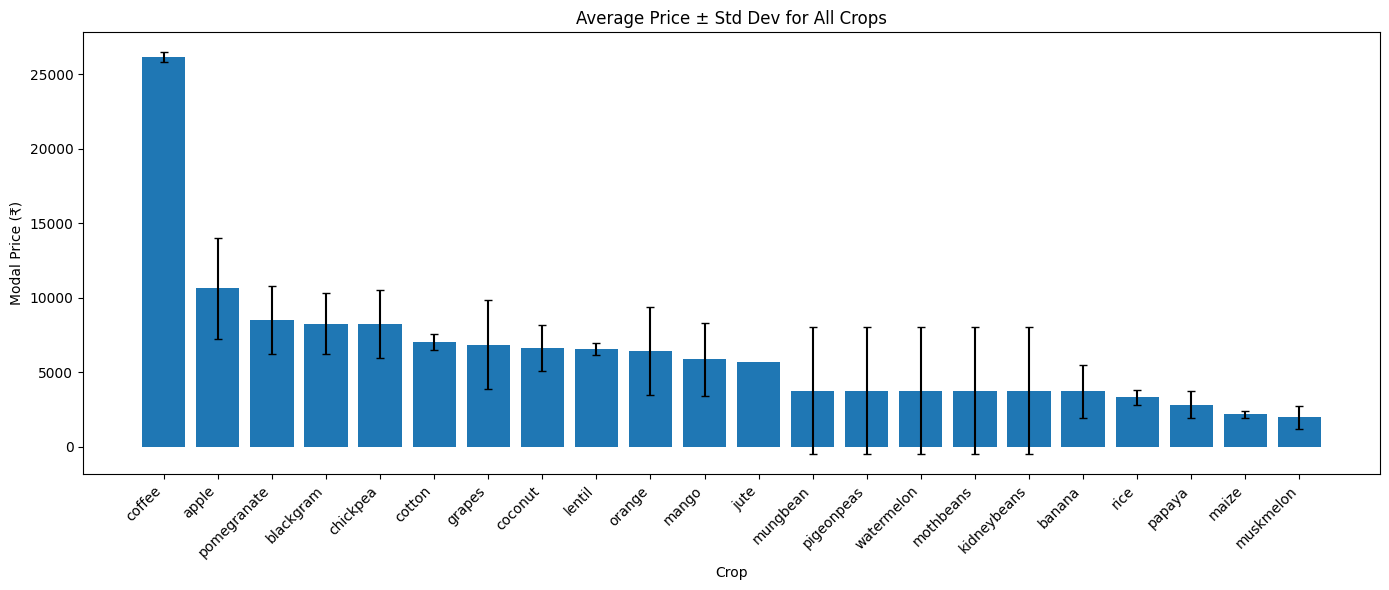

In [ ]:
crops = df_prices_sorted['crop']
vals  = df_prices_sorted['price_mean']
errs  = df_prices_sorted['price_std']

plt.figure(figsize=(14, 6))
plt.bar(crops, vals, yerr=errs, capsize=3)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Crop')
plt.ylabel('Modal Price (₹)')
plt.title('Average Price ± Std Dev for All Crops')
plt.tight_layout()
plt.show()